This code is inspired by the question [How to find all possible values that fit a matrical set of inequalities?](https://math.stackexchange.com/questions/5057764/how-to-find-all-possible-values-that-fit-a-matrical-set-of-inequalities) on Mathematics Stack Exchange (MSE).

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.spatial import HalfspaceIntersection, ConvexHull
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Determine inequalities
First determine the (simplified) inequalities using symbolic derivation.

In [15]:
x1, x2, x3, x4 = sp.symbols('x1 x2 x3 x4')

# Define the 4 functions using symbolic derivation
a = 7*x1 + 3*x2 + 2*x3 + x4
b = 4*x1 + 2*x2 + 2*x3 + 4*x4
c = 2*x1 + 6*x2 + 3*x3 + 5*x4
d = 3*x1 + 5*x2 + 5*x3 + 3*x4

# Compute the differences
ineq1 = sp.simplify(a - b)  # a > b ⇒ a - b > 0
ineq2 = sp.simplify(b - c)  # b > c ⇒ b - c > 0
ineq3 = sp.simplify(c - d)  # c > d ⇒ c - d > 0

# Print symbolic results
print("Inequality 1: a - b > 0   ⇒", ineq1, "> 0")
print("Inequality 2: b - c > 0   ⇒", ineq2, "> 0")
print("Inequality 3: c - d > 0   ⇒", ineq3, "> 0")

# This is my vague point here:
# Substitute fixed x3 = 0, x4 = 1
subs = {x3: 0, x4: 1}
ineq1_eval = ineq1.subs(subs)  # 3*x1 + x2 - 3
ineq2_eval = ineq2.subs(subs)  # 2*x1 - 4*x2 - 1
ineq3_eval = ineq3.subs(subs)  # -x1 + x2 + 2
print("\nAfter substitution x3 = 0, x4 = 1:")
print("Inequality 1:", ineq1_eval, "> 0")
print("Inequality 2:", ineq2_eval, "> 0")
print("Inequality 3:", ineq3_eval, "> 0")

Inequality 1: a - b > 0   ⇒ 3*x1 + x2 - 3*x4 > 0
Inequality 2: b - c > 0   ⇒ 2*x1 - 4*x2 - x3 - x4 > 0
Inequality 3: c - d > 0   ⇒ -x1 + x2 - 2*x3 + 2*x4 > 0

After substitution x3 = 0, x4 = 1:
Inequality 1: 3*x1 + x2 - 3 > 0
Inequality 2: 2*x1 - 4*x2 - 1 > 0
Inequality 3: -x1 + x2 + 2 > 0


# Describe the half space
Now use the inequalities for describing the half space. The vague part is that was fixing $x_3$ and $x_4$.

In [16]:
# convert to A*x + b <= 0
# Negate each inequality
# Inequality: 3x1 + x2 - 3 > 0  →  -3x1 - x2 + 3 <= 0

halfspaces = np.array([
    [-3, -1],    # -ineq1
    [-2,  4],    # -ineq2
    [ 1, -1]     # -ineq3
])
offsets = np.array([3, 1, 2])
halfspaces_full = np.hstack([halfspaces, -offsets[:, None]])

# Calculate region, corner points and centroid
Let's pick valid interior point and compute a feasable region and print the corner points where the corners of the solution give you the extreme valid combinations for $x_1$, $x_2$.

In [17]:
interior_point = np.array([1.5, 0.2])

# compute feasible region
hs = HalfspaceIntersection(halfspaces_full, interior_point)
hull = ConvexHull(hs.intersections)

# print the feasible corner points
print("Vertices of the feasible region (x1, x2):")
for pt in hs.intersections[hull.vertices]:
    print(np.round(pt, 4))

# compute centroid (average value)
centroid = np.mean(hs.intersections[hull.vertices], axis=0)
print("\nApproximate centroid (average of feasible values):")
print(np.round(centroid, 4))

Vertices of the feasible region (x1, x2):
[4.5 2.5]
[-0.9286 -0.2143]
[-0.25 -2.25]

Approximate centroid (average of feasible values):
[1.1071 0.0119]


# Plot the region

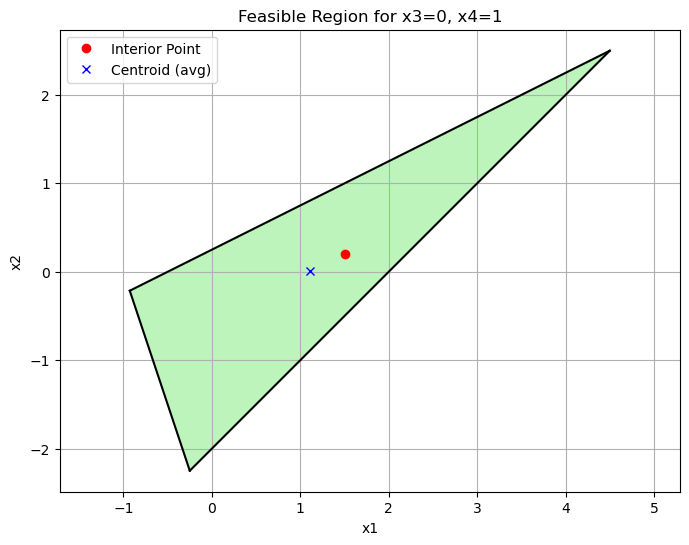

In [18]:
plt.figure(figsize=(8, 6))
for simplex in hull.simplices:
    plt.plot(hs.intersections[simplex, 0], hs.intersections[simplex, 1], 'k-')

plt.fill(hs.intersections[hull.vertices, 0],
         hs.intersections[hull.vertices, 1],
         color='lightgreen', alpha=0.6)

plt.plot(*interior_point, 'ro', label="Interior Point")
plt.plot(*centroid, 'bx', label="Centroid (avg)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Feasible Region for x3=0, x4=1")
plt.grid(True)
plt.legend()
plt.axis("equal")
plt.show()

# Fourier-Motzkin-Elimination (FME)

In [25]:
ineqs = [
    3*x1 + x2 - 3*x4 >= 0,
    2*x1 - 4*x2 - x3 - x4 >= 0,
    -x1 + x2 - 2*x3 + 2*x4 >= 0
]

# Eliminate x1
reduced = sp.reduce_inequalities(ineqs, [x1])
print("Reduced inequalities without x1:")
print(reduced)

Reduced inequalities without x1:
(-oo < x1) & (x1 < oo) & (x1 >= -x2/3 + x4) & (x1 <= x2 - 2*x3 + 2*x4) & (x1 >= 2*x2 + x3/2 + x4/2)
